In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Q2. 
1. Which borough has the highest and lowest pickup rates?
2. calculate per capita rate
3. pickup rate for holiday and regular days for each borough

pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [2]:
df_borough = pd.read_csv("Resources/clean.csv")
df_borough.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [3]:
# Create a dictionary with borough population data
borough_population_data = {
    'borough': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island','EWR'],
    'population': [1630000, 2595000, 2301000, 1428000, 472481, 37494704]
}

# Create a DataFrame from the dictionary
borough_population_df = pd.DataFrame(borough_population_data)

borough_population_df

,borough,population
0,Manhattan,1630000
1,Brooklyn,2595000
2,Queens,2301000
3,Bronx,1428000
4,Staten Island,472481
5,EWR,37494704


In [4]:
# Merge the two DataFrames together based on the Year and State they share
df_borough_population = df_borough.merge(borough_population_df, on=["borough"])
df_borough_population.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday,population
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,1428000
1,2015-01-01 01:00:00,1,January,Bronx,152.0,5.000000,10.000000,-1.111111,7.000000,1023.500000,0.000000,0.000000,0.000000,0.000000,N,1428000
2,2015-01-01 02:00:00,2,January,Bronx,120.0,3.000000,10.000000,-1.111111,6.000000,1023.000000,0.000000,0.000000,0.000000,0.000000,N,1428000
3,2015-01-01 03:00:00,3,January,Bronx,132.0,5.000000,10.000000,-1.111111,8.000000,1022.300000,0.000000,0.000000,0.000000,0.000000,N,1428000
4,2015-01-01 04:00:00,4,January,Bronx,128.0,5.000000,10.000000,-1.666667,9.000000,1022.000000,0.000000,0.000000,0.000000,0.000000,N,1428000


In [5]:
df_borough_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pickup_dt           26064 non-null  object 
 1   hour                26064 non-null  int64  
 2   month               26064 non-null  object 
 3   borough             26064 non-null  object 
 4   pickups             26064 non-null  float64
 5   Wind speed          26064 non-null  float64
 6   Visibility          26064 non-null  float64
 7   Temperature         26064 non-null  float64
 8   dew point           26064 non-null  float64
 9   Sea level pressure  26064 non-null  float64
 10  Precipitation 01    26064 non-null  float64
 11  Precipitation 06    26064 non-null  float64
 12  Precipitation 24    26064 non-null  float64
 13  Snow depth          26064 non-null  float64
 14  Holiday             26064 non-null  object 
 15  population          26064 non-null  int64  
dtypes: f

In [6]:
df_borough_population['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

Which borough has the highest and lowest pickup rates?

In [7]:
# Group the data by 'Borough' and calculate the pickup rate for each borough
pickup_rates = df_borough_population.groupby('borough')['pickups'].agg(['sum', 'mean']).reset_index()
pickup_rates = pickup_rates.rename(columns={'sum': 'pickups_total', 'mean': 'pickups_per_day'})

# Find the borough with the highest pickup rate
highest_pickup_rate = pickup_rates['pickups_per_day'].max()
highest_pickup_borough = pickup_rates.loc[pickup_rates['pickups_per_day'] == highest_pickup_rate, 'borough'].values[0]

# Find the borough with the lowest pickup rate
lowest_pickup_rate = pickup_rates['pickups_per_day'].min()
lowest_pickup_borough = pickup_rates.loc[pickup_rates['pickups_per_day'] == lowest_pickup_rate, 'borough'].values[0]

In [8]:
pickup_rates

,borough,pickups_total,pickups_per_day
0,Bronx,220080.0,50.662983
1,Brooklyn,2321552.0,534.427256
2,EWR,105.0,0.024171
3,Manhattan,10369142.0,2387.003223
4,Queens,1343771.0,309.339549
5,Staten Island,6957.0,1.601519


In [9]:
print(f"Borough: {highest_pickup_borough}, Highest pickup Rate: {highest_pickup_rate}")

Borough: Manhattan, Highest pickup Rate: 2387.0032228360956


In [10]:
print(f"Borough: {lowest_pickup_borough}, Lowest pickup Rate: {lowest_pickup_rate}")

Borough: EWR, Lowest pickup Rate: 0.024171270718232045


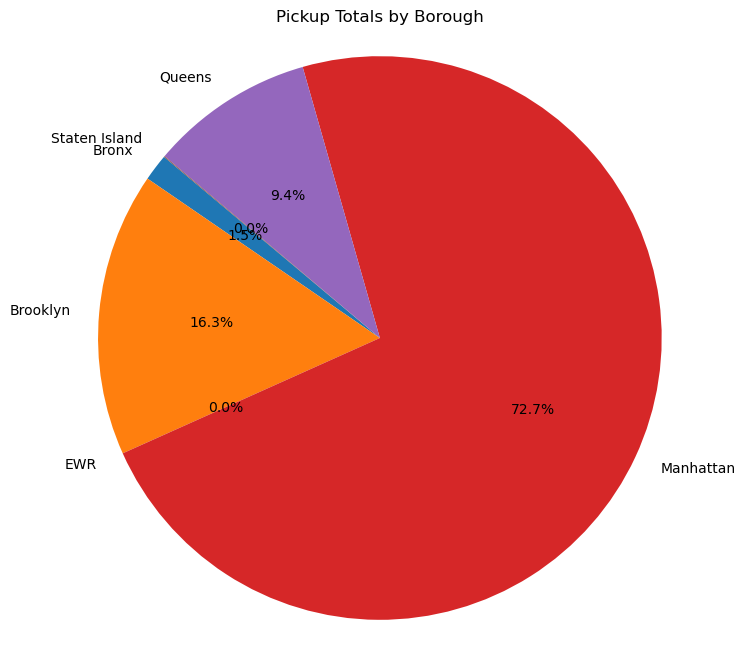

In [11]:
#pie chart for borough and pickup total

# Data for the pie chart
labels = pickup_rates['borough']
sizes = pickup_rates['pickups_total']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pickup Totals by Borough')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


pickup rate per capita

In [12]:
#Calculate per capita rate
df_pickup_rates_population = pickup_rates.merge(borough_population_df, on=["borough"])
df_pickup_rates_population['pickup_per_capita_rates'] = df_pickup_rates_population['pickups_total'] / df_pickup_rates_population['population']

df_pickup_rates_population

,borough,pickups_total,pickups_per_day,population,pickup_per_capita_rates
0,Bronx,220080.0,50.662983,1428000,0.154118
1,Brooklyn,2321552.0,534.427256,2595000,0.894625
2,EWR,105.0,0.024171,37494704,0.000003
3,Manhattan,10369142.0,2387.003223,1630000,6.361437
4,Queens,1343771.0,309.339549,2301000,0.583994
5,Staten Island,6957.0,1.601519,472481,0.014724


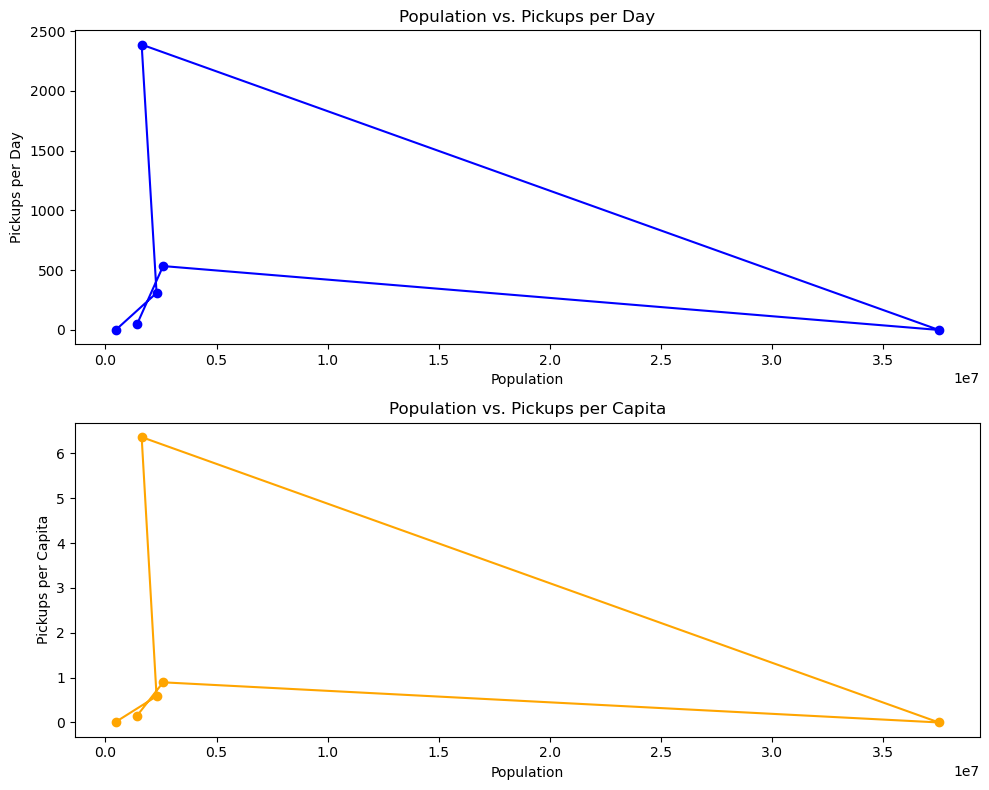

In [13]:
#line chart for population vs pickups per day / pickups per capita

# Data for the line chart (population vs. pickups per day)
x_population = df_pickup_rates_population['population']
y_pickups_per_day = df_pickup_rates_population['pickups_per_day']

# Data for the line chart (population vs. pickups per capita)
y_pickups_per_capita = df_pickup_rates_population['pickup_per_capita_rates']

# Create a figure with two subplots (one for each line chart)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Line chart 1: Population vs. Pickups per Day (Blue Line)
ax1.plot(x_population, y_pickups_per_day, marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Population')
ax1.set_ylabel('Pickups per Day')
ax1.set_title('Population vs. Pickups per Day')

# Line chart 2: Population vs. Pickups per Capita (Orange Line)
ax2.plot(x_population, y_pickups_per_capita, marker='o', linestyle='-', color='orange')
ax2.set_xlabel('Population')
ax2.set_ylabel('Pickups per Capita')
ax2.set_title('Population vs. Pickups per Capita')

# Adjust layout
plt.tight_layout()

# Show the line charts
plt.show()


pickup rate for holiday and regular days

In [14]:
# Calculate total pickup rates by holiday type
pickup_rates_by_holiday_per_day = df_borough_population.groupby(['borough', 'Holiday']).agg({'pickups': ['sum', 'mean']}).reset_index()
pickup_rates_by_holiday_per_day.columns = ['borough', 'Holiday', 'total_pickups', 'pickups_per_day']

# Calculate pickup rate per capita by holiday type
pickup_rates_by_holiday_per_day_capita = pickup_rates_by_holiday_per_day.merge(borough_population_df, on='borough')
pickup_rates_by_holiday_per_day_capita['pickup_per_capita'] = pickup_rates_by_holiday_per_day_capita['total_pickups'] / pickup_rates_by_holiday_per_day_capita['population']

# Pivot the DataFrame to have "Y" and "N" holiday types as columns
pickup_rates_by_holiday_per_day_capita_pivot = pickup_rates_by_holiday_per_day_capita.pivot(index='borough', columns='Holiday', values=['pickups_per_day', 'pickup_per_capita'])

# Rename the columns for clarity
pickup_rates_by_holiday_per_day_capita_pivot = pickup_rates_by_holiday_per_day_capita_pivot.rename(columns={'Y': 'Holiday', 'N': 'Regular Day'})

pickup_rates_by_holiday_per_day_capita_pivot['Population'] = df_pickup_rates_population.set_index('borough')['population']

pickup_rates_by_holiday_per_day_capita_pivot


pickups_per_day              pickup_per_capita                \
Holiday           Regular Day      Holiday       Regular Day       Holiday   
borough                                                                      
Bronx               46.332039    61.334928          0.100256  5.386134e-02   
Brooklyn           458.099353   722.507974          0.545482  3.491426e-01   
EWR                  0.027184     0.016746          0.000002  5.600791e-07   
Manhattan         2378.321036  2408.397129          4.508596  1.852840e+00   
Queens             297.085761   339.534290          0.398955  1.850395e-01   
Staten Island        1.472816     1.918660          0.009632  5.092268e-03   

              Population  
Holiday                   
borough                   
Bronx            1428000  
Brooklyn         2595000  
EWR             37494704  
Manhattan        1630000  
Queens           2301000  
Staten Island     472481

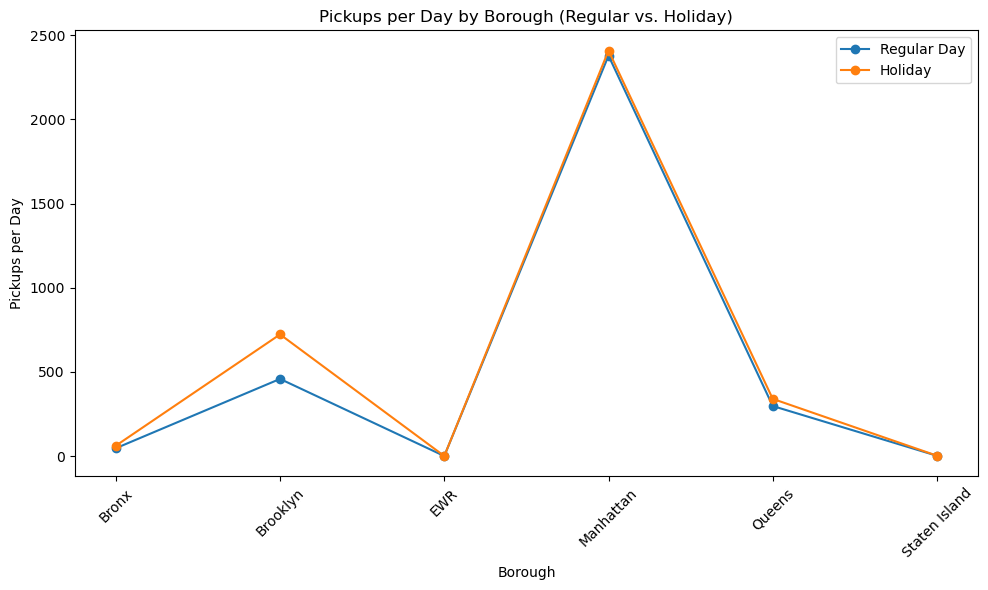

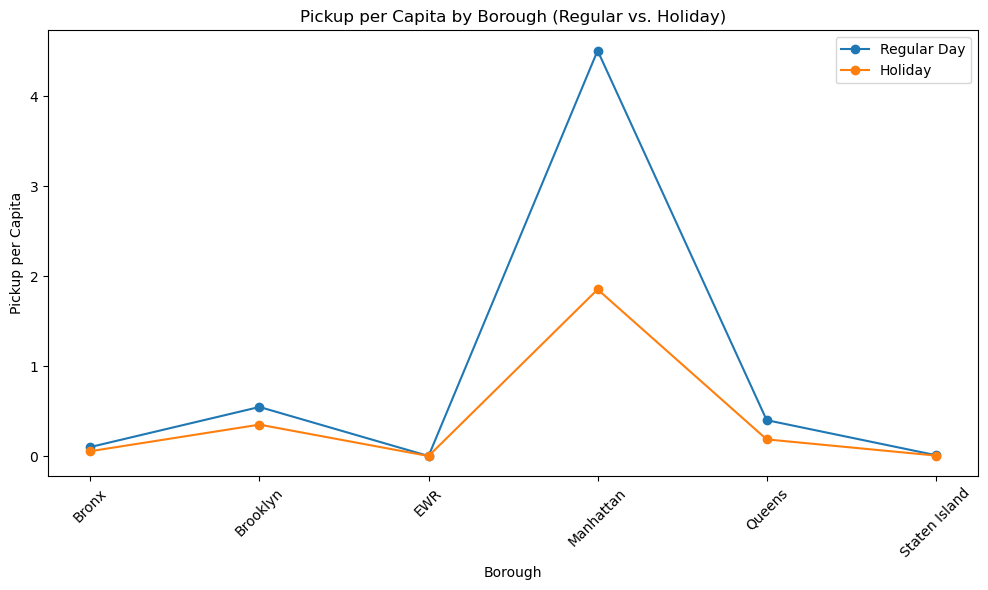

In [15]:
#line chart for regular vs holiday for pickups per day / pickups per capita

# Add population to the DataFrame
pickup_rates_by_holiday_per_day_capita_pivot['Population'] = df_pickup_rates_population.set_index('borough')['population']

# Create line chart for pickups per day (Regular vs. Holiday)
plt.figure(figsize=(10, 6))
plt.plot(pickup_rates_by_holiday_per_day_capita_pivot.index, pickup_rates_by_holiday_per_day_capita_pivot[('pickups_per_day', 'Regular Day')], label='Regular Day', marker='o')
plt.plot(pickup_rates_by_holiday_per_day_capita_pivot.index, pickup_rates_by_holiday_per_day_capita_pivot[('pickups_per_day', 'Holiday')], label='Holiday', marker='o')
plt.xlabel('Borough')
plt.ylabel('Pickups per Day')
plt.title('Pickups per Day by Borough (Regular vs. Holiday)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Create line chart for pickups per capita (Regular vs. Holiday)
plt.figure(figsize=(10, 6))
plt.plot(pickup_rates_by_holiday_per_day_capita_pivot.index, pickup_rates_by_holiday_per_day_capita_pivot[('pickup_per_capita', 'Regular Day')], label='Regular Day', marker='o')
plt.plot(pickup_rates_by_holiday_per_day_capita_pivot.index, pickup_rates_by_holiday_per_day_capita_pivot[('pickup_per_capita', 'Holiday')], label='Holiday', marker='o')
plt.xlabel('Borough')
plt.ylabel('Pickup per Capita')
plt.title('Pickup per Capita by Borough (Regular vs. Holiday)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the line charts
plt.show()
